In [1]:
# https://colab.research.google.com/github/pytorch/vision/blob/temp-tutorial/tutorials/torchvision_finetuning_instance_segmentation.ipynb
import os
def rt(p):
    return os.path.join('../../',p)

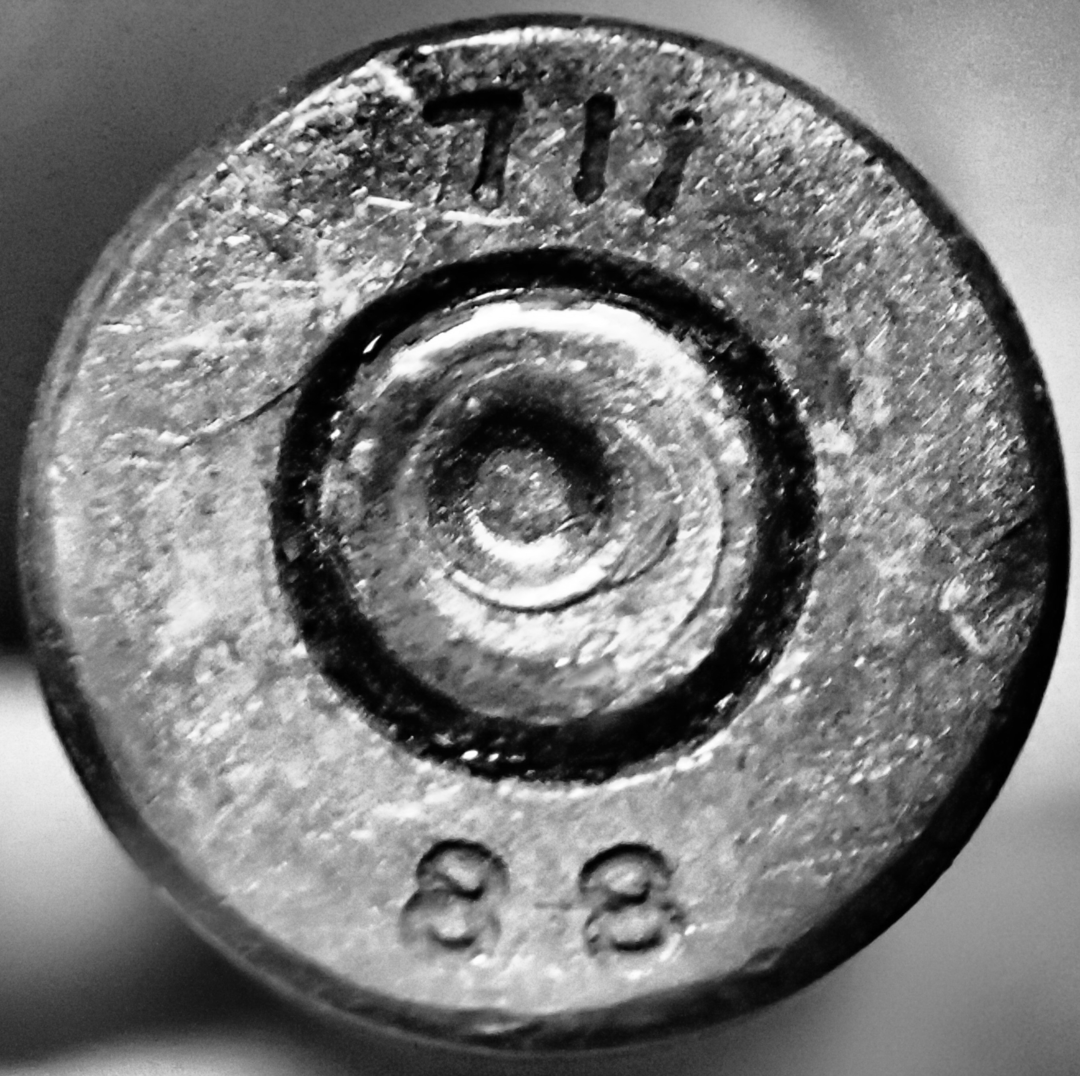

In [10]:
from PIL import Image, ImageOps
img = Image.open(rt('data/Image C7  711_88_cropped.jpg'))
img = img.resize((1080, int(1080*img.height/img.width)))
img = ImageOps.grayscale(img)
img

In [11]:
import numpy as np
pixels = np.array(img)
pixels.shape

(1076, 1080)

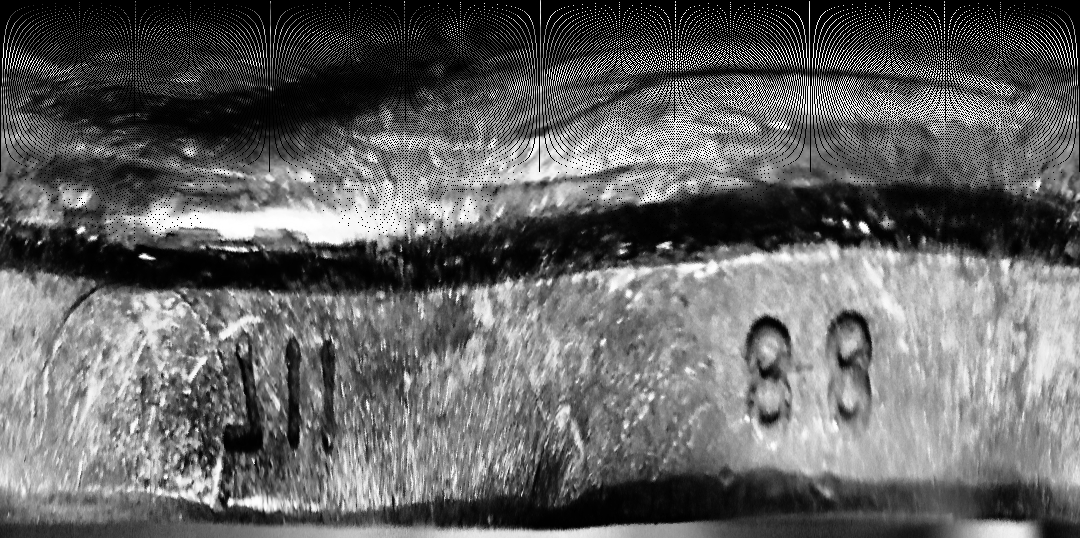

In [17]:
from math import sqrt, atan2, cos, sin, pi
def unroll(w,h,src):    
    x0,y0 = src
    xo, yo = w/2, h/2
    dx = x0-xo
    dy = y0-yo
    r = sqrt(dx**2+dy**2)
    theta = atan2(dy,dx)
    return r, theta

def roll(w,h, src):
    (r,theta) = src
    xo, yo = w/2, h/2
    x = xo + r*cos(theta)
    y = yo + r*sin(theta)
    return x,y

w,h = img.size
outPixels = np.empty((h//2, w))

for y in range(h):
    for x in range(w):
        (r,theta)=unroll(w,h, (x,y))
        if r<h//2 and theta<pi:
            outPixels[int(r),int((theta+pi)*w/(2*pi))] = pixels[y,x]

imageOut = Image.fromarray(outPixels.astype('uint8'))
imageOut

In [18]:
imageOut.save(rt('data/unrolled.jpg'))